In [2]:
import yfinance as yf
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('individual_bank_data.csv')

In [4]:
df['daily_return'] = df.groupby('Index')['Close'].pct_change()

In [5]:
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['EMA_9'] = df['Close'].ewm(span=9, adjust=False).mean()

In [6]:
df['ATR'] = (df['High'] - df['Low']).rolling(window=14).mean()

In [7]:
df['cumulative_return'] = (1 + df['daily_return']).cumprod()

In [9]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
monthly_trends = df.groupby(['Index', 'Month']).agg({'Close': 'mean'})

In [10]:
# Summary statistics for each bank and the overall Nifty Bank Index
summary_stats = df.groupby('Index').describe()

In [13]:
# Calculate the daily price range for each bank and the Nifty Bank Index
df['price_range'] = df['High'] - df['Low']

In [11]:
# Calculate rolling 14-day volatility (standard deviation) for each bank
df['volatility_14d'] = df.groupby('Index')['daily_return'].transform(lambda x: x.rolling(window=14).std())

In [14]:
# Calculate the Average True Range (ATR) for each bank and the Nifty Bank Index
df['ATR'] = df.groupby('Index').apply(lambda x: (x['High'] - x['Low']).rolling(window=14).mean()).reset_index(level=0, drop=True)

C:\Users\Sailesh\AppData\Local\Temp\ipykernel_11116\4257230506.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['ATR'] = df.groupby('Index').apply(lambda x: (x['High'] - x['Low']).rolling(window=14).mean()).reset_index(level=0, drop=True)


In [37]:
# Identify key support and resistance levels (simplified as 1-year high and low)
support_levels = df.groupby('Index')['Low'].min()
resistance_levels = df.groupby('Index')['High'].max()
print(support_levels)
print(resistance_levels)

Index
AU Small Finance Bank     548.150024
Axis Bank                 814.250000
Bandhan Bank              182.199997
Bank of Baroda            146.500000
Federal Bank              120.900002
HDFC Bank                1460.550049
ICICI Bank                796.099976
IDFC First Bank            52.110001
IndusInd Bank             990.250000
Kotak Bank               1644.199951
Punjab National Bank       44.410000
State Bank of India       499.350006
Name: Low, dtype: float64
Index
AU Small Finance Bank     798.849976
Axis Bank                1151.500000
Bandhan Bank              272.000000
Bank of Baroda            235.949997
Federal Bank              159.250000
HDFC Bank                1733.949951
ICICI Bank               1042.650024
IDFC First Bank           100.739998
IndusInd Bank            1618.800049
Kotak Bank               2063.000000
Punjab National Bank       97.699997
State Bank of India       660.400024
Name: High, dtype: float64


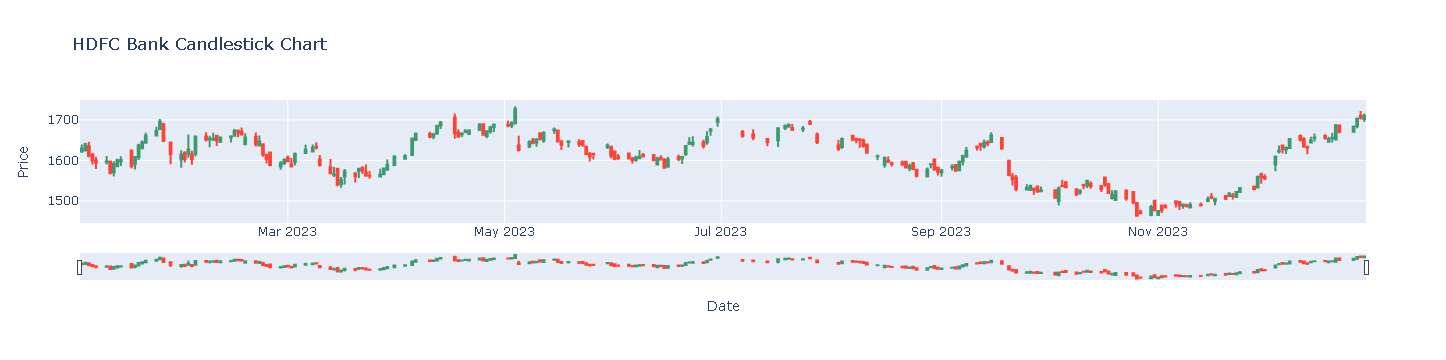

In [40]:
import plotly.graph_objects as go

# Plot a candlestick chart for a specific bank (e.g., HDFC Bank)
df_bank = df[df['Index'] == 'HDFC Bank']
fig = go.Figure(data=[go.Candlestick(x=df_bank['Date'],
                                     open=df_bank['Open'],
                                     high=df_bank['High'],
                                     low=df_bank['Low'],
                                     close=df_bank['Close'])])

fig.update_layout(title='HDFC Bank Candlestick Chart', xaxis_title='Date', yaxis_title='Price')
fig.show()


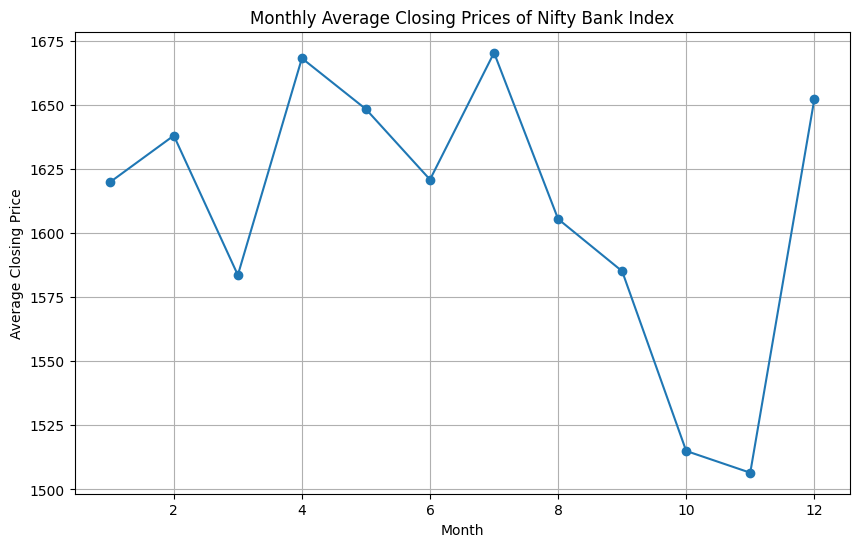

In [20]:
# Extract month and calculate monthly average closing prices for each bank
df['Month'] = pd.to_datetime(df['Date']).dt.month
monthly_trends = df.groupby(['Index', 'Month']).agg({'Close': 'mean'}).reset_index()

# Plot monthly trends for Nifty Bank Index
nifty_monthly = monthly_trends[monthly_trends['Index'] == 'HDFC Bank']
plt.figure(figsize=(10, 6))
plt.plot(nifty_monthly['Month'], nifty_monthly['Close'], marker='o')
plt.title('Monthly Average Closing Prices of Nifty Bank Index')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.grid(True)
plt.show()


In [21]:
# Calculate yearly percentage change for each bank
df['yearly_return'] = df.groupby('Index')['Close'].transform(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

# Rank banks based on yearly percentage change
yearly_performance = df.groupby('Index')['yearly_return'].last().sort_values(ascending=False)
print(yearly_performance)


Index
Punjab National Bank     67.611546
IDFC First Bank          45.482818
IndusInd Bank            30.272284
Bank of Baroda           24.080540
AU Small Finance Bank    19.832509
Axis Bank                17.154383
Federal Bank             13.367243
ICICI Bank               10.348839
HDFC Bank                 4.941227
State Bank of India       4.850962
Kotak Bank                4.504751
Bandhan Bank              0.499693
Name: yearly_return, dtype: float64


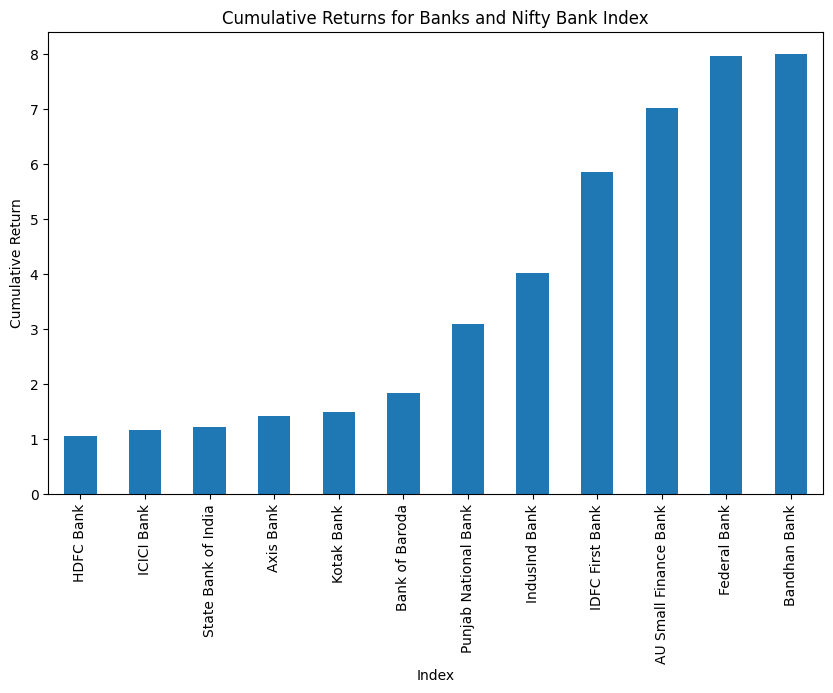

In [22]:
# Bar chart for cumulative returns at the end of the year
cumulative_returns_end = df.groupby('Index')['cumulative_return'].last().sort_values()
cumulative_returns_end.plot(kind='bar', figsize=(10, 6), title='Cumulative Returns for Banks and Nifty Bank Index')
plt.ylabel('Cumulative Return')
plt.show()

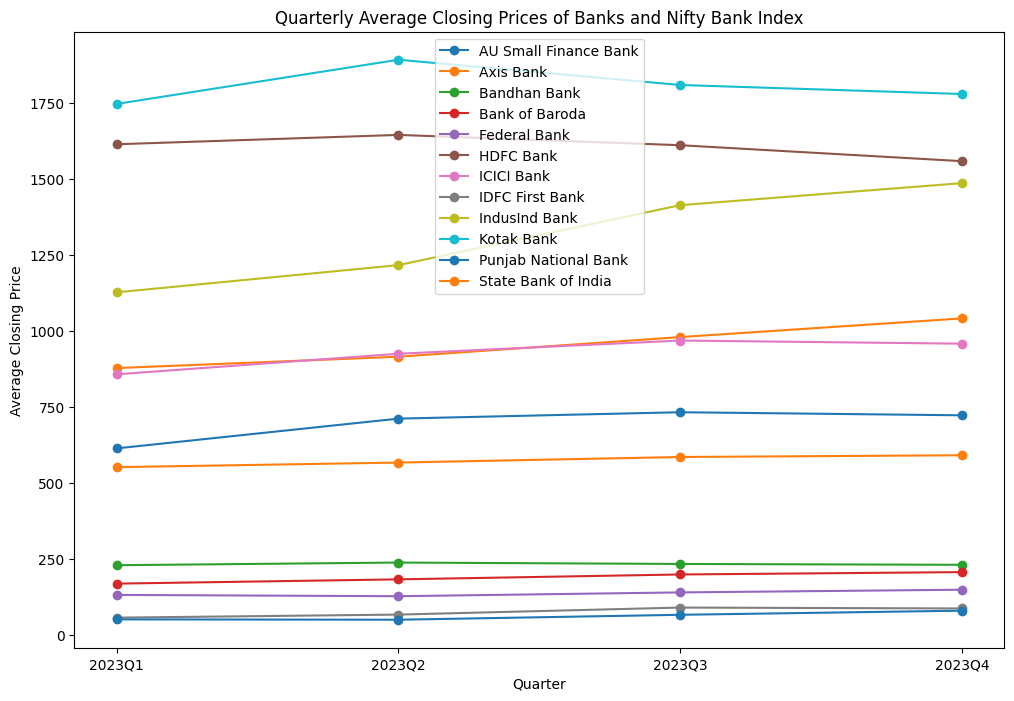

In [25]:
# Group data by bank and quarter, and compute mean closing prices
df['quarter'] = pd.to_datetime(df['Date']).dt.to_period('Q')
quarterly_trends = df.groupby(['Index', 'quarter']).agg({'Close': 'mean'}).reset_index()

# Plot quarterly trends for all banks
plt.figure(figsize=(12, 8))
for name, group in quarterly_trends.groupby('Index'):
    plt.plot(group['quarter'].astype(str), group['Close'], marker='o', label=name)

plt.title('Quarterly Average Closing Prices of Banks and Nifty Bank Index')
plt.xlabel('Quarter')
plt.ylabel('Average Closing Price')
plt.legend()
plt.show()


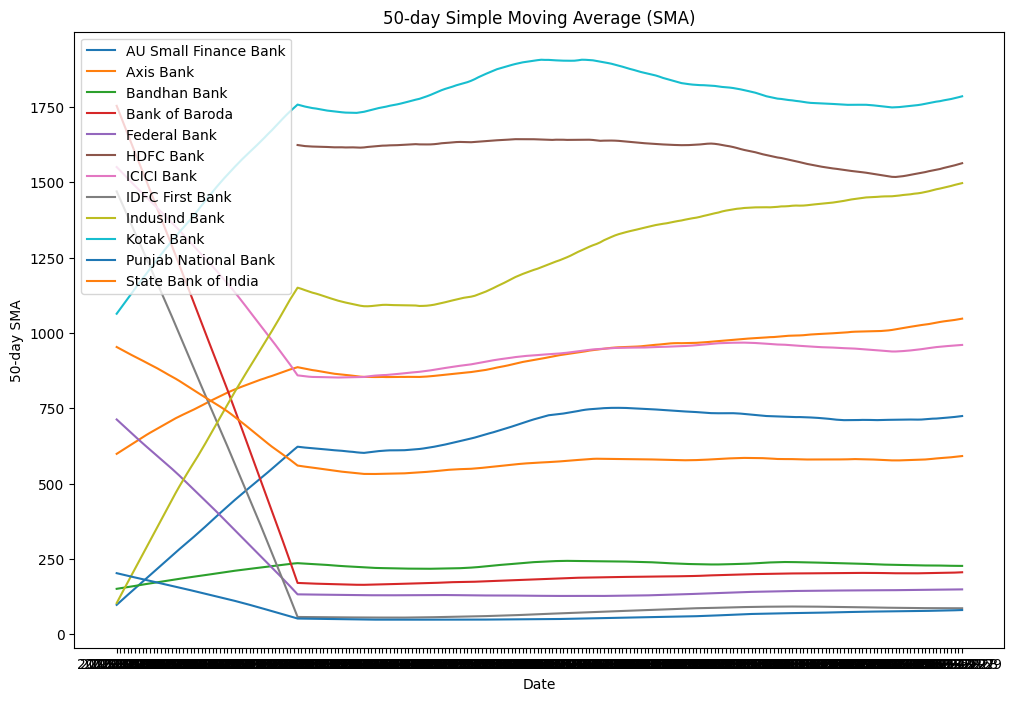

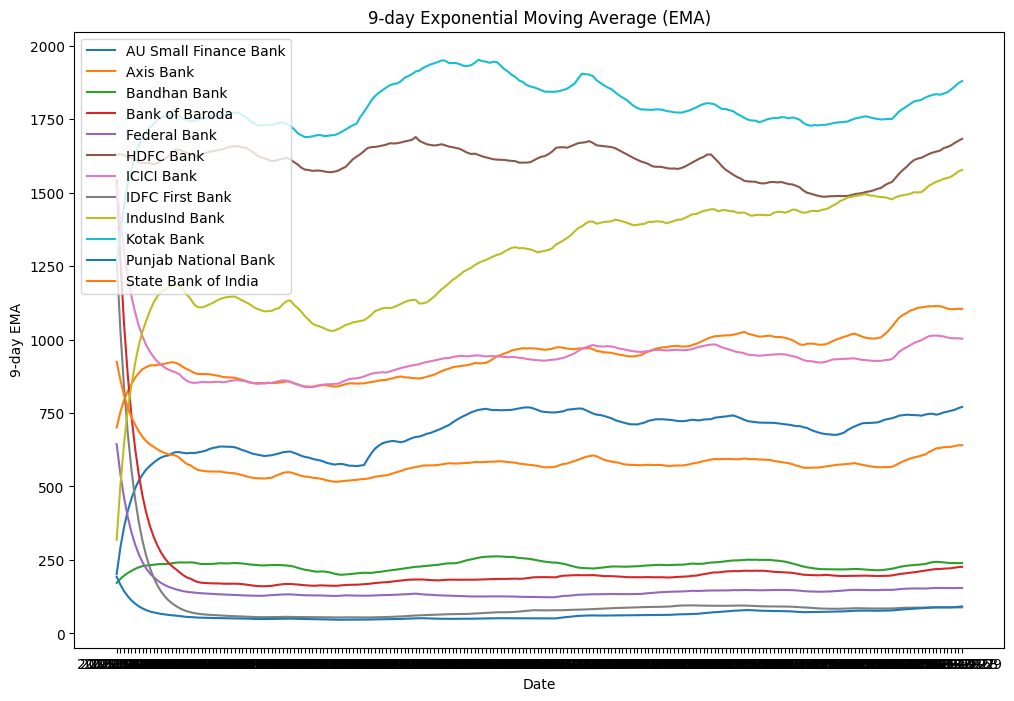

In [29]:
# Plot 50-day SMA for each bank and Nifty Bank Index
plt.figure(figsize=(12, 8))
for name, group in df.groupby('Index'):
    plt.plot(group['Date'], group['SMA_50'], label=name)

plt.title('50-day Simple Moving Average (SMA)')
plt.xlabel('Date')
plt.ylabel('50-day SMA')
plt.legend()
plt.show()

# Plot 9-day EMA for each bank and Nifty Bank Index
plt.figure(figsize=(12, 8))
for name, group in df.groupby('Index'):
    plt.plot(group['Date'], group['EMA_9'], label=name)

plt.title('9-day Exponential Moving Average (EMA)')
plt.xlabel('Date')
plt.ylabel('9-day EMA')
plt.legend()
plt.show()


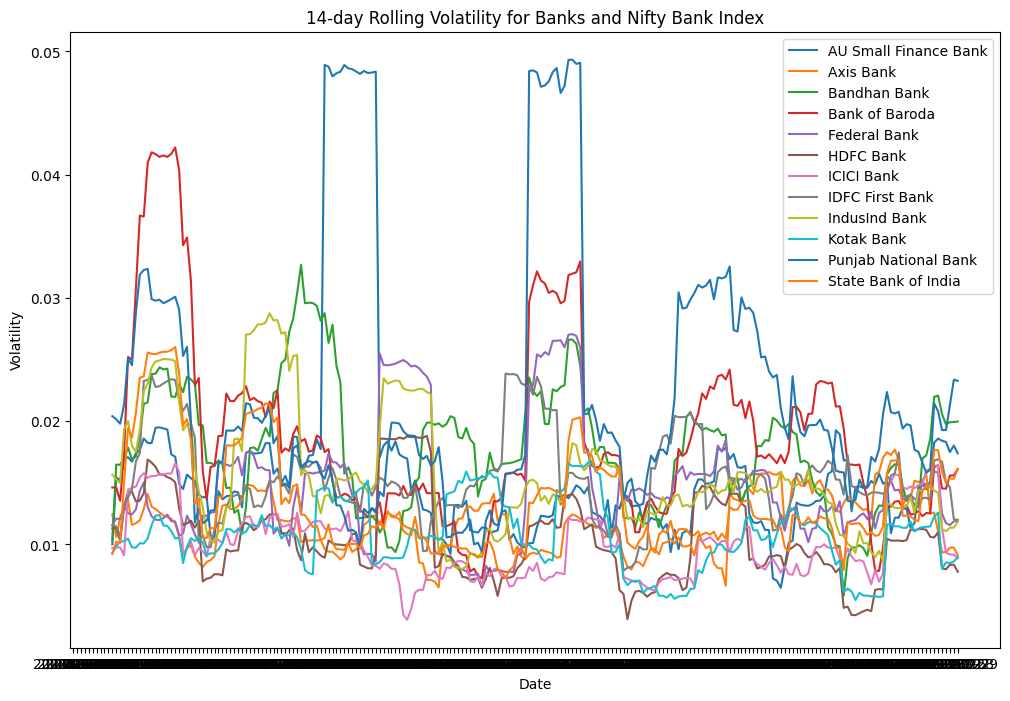

In [30]:
# Plot 14-day rolling volatility for each bank and Nifty Bank Index
plt.figure(figsize=(12, 8))
for name, group in df.groupby('Index'):
    plt.plot(group['Date'], group['volatility_14d'], label=name)

plt.title('14-day Rolling Volatility for Banks and Nifty Bank Index')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


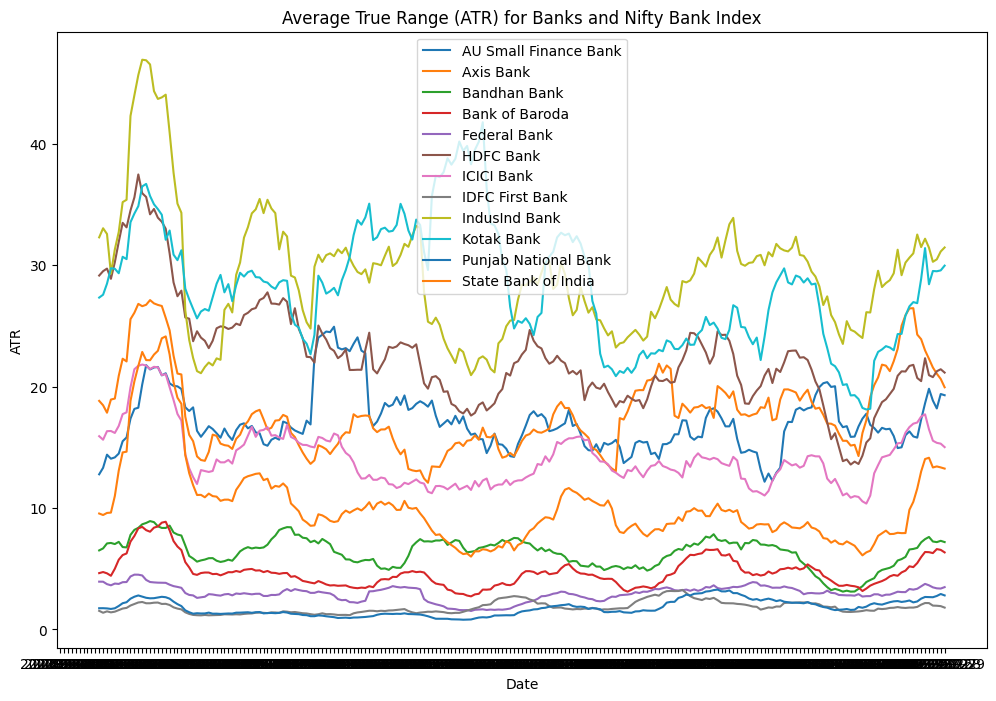

In [32]:
# Plot ATR for each bank and Nifty Bank Index
plt.figure(figsize=(12, 8))
for name, group in df.groupby('Index'):
    plt.plot(group['Date'], group['ATR'], label=name)

plt.title('Average True Range (ATR) for Banks and Nifty Bank Index')
plt.xlabel('Date')
plt.ylabel('ATR')
plt.legend()
plt.show()


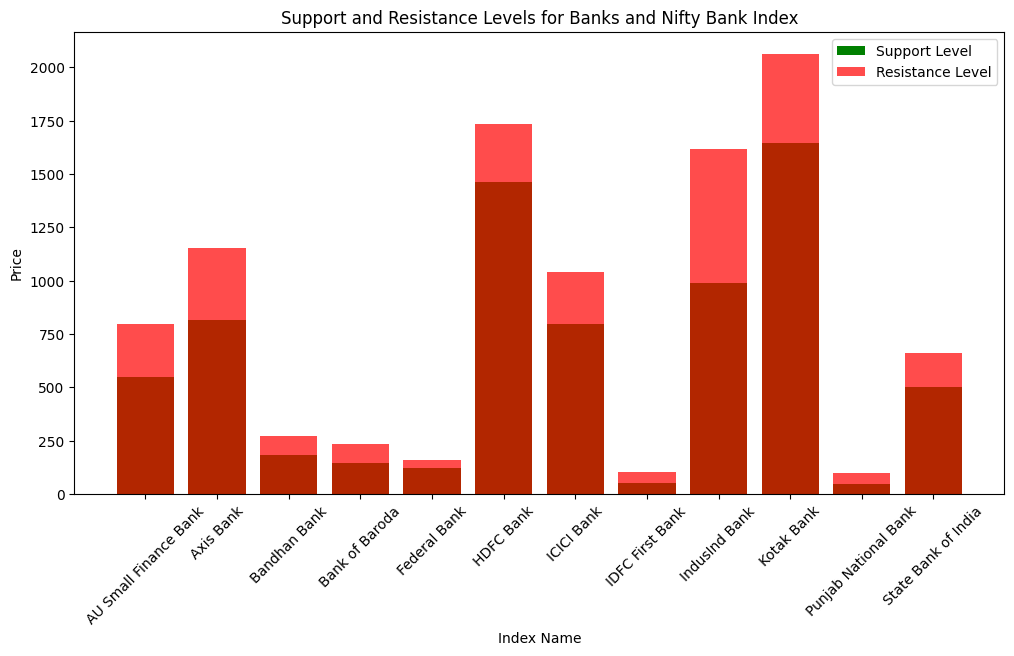

In [33]:
# Plot bar charts for support and resistance levels
plt.figure(figsize=(12, 6))
plt.bar(support_levels.index, support_levels, color='green', label='Support Level')
plt.bar(resistance_levels.index, resistance_levels, color='red', alpha=0.7, label='Resistance Level')
plt.title('Support and Resistance Levels for Banks and Nifty Bank Index')
plt.ylabel('Price')
plt.xlabel('Index Name')
plt.xticks(rotation=45)
plt.legend()
plt.show()


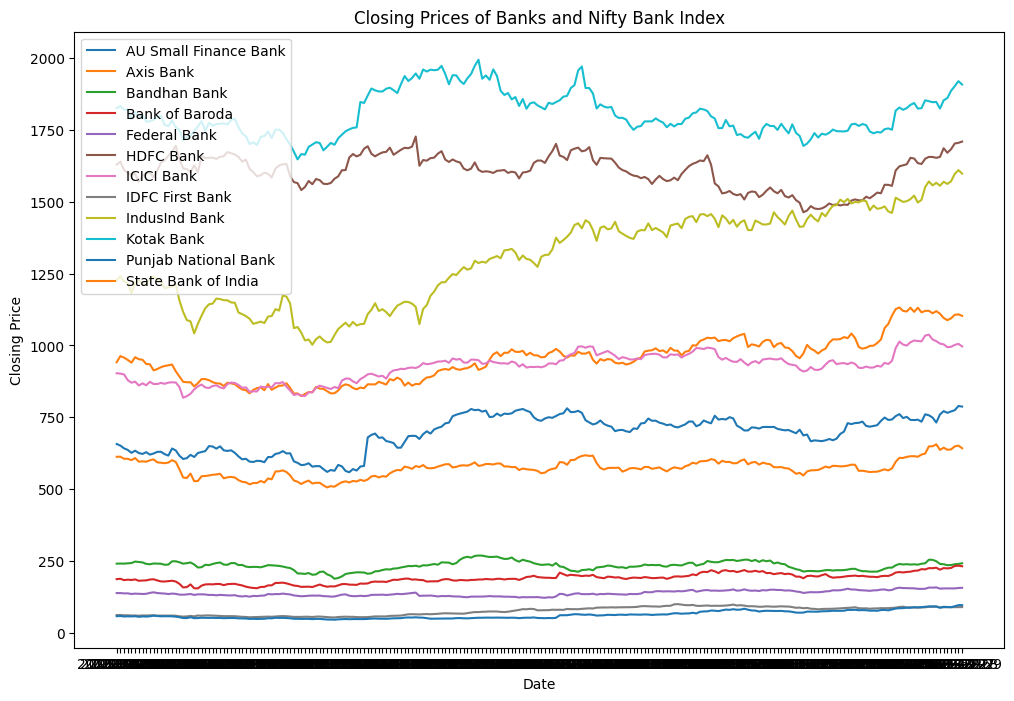

In [36]:
# Plot closing prices over time
plt.figure(figsize=(12, 8))
for name, group in df.groupby('Index'):
    plt.plot(group['Date'], group['Close'], label=name)

plt.title('Closing Prices of Banks and Nifty Bank Index')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()
